In [391]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [392]:
data=pd.read_excel('optimal_preis_1000_model1_with_neighbors_count.xlsx')

In [393]:
data

,Qid,Preis,Optimal_preis,Min_optimal_preis_5%_margin,Max_optimal_preis_5%_margin,Neighbors_count
0,12680,38.6,39.339339,37.372372,41.306306,8
1,13672,12.0,9.209209,8.748749,9.669670,3
2,13732,16.4,14.114114,13.408408,14.819820,11
3,13753,22.1,23.123123,21.966967,24.279279,0
4,13813,10.9,6.606607,6.276276,6.936937,19
...,...,...,...,...,...,...
995,417399,15.2,15.315315,14.549550,16.081081,7
996,417667,56.0,68.668669,65.235235,72.102102,1
997,418527,18.8,19.019019,18.068068,19.969970,2
998,420114,59.6,68.868869,65.425425,72.312312,6


In [394]:
data_percentage=(data.Optimal_preis-data.Preis)/data.Preis*100

In [395]:
data_diff=data[data.Neighbors_count<100].copy()
data_diff['Difference']=data_percentage

In [396]:
data_diff

,Qid,Preis,Optimal_preis,Min_optimal_preis_5%_margin,Max_optimal_preis_5%_margin,Neighbors_count,Difference
0,12680,38.6,39.339339,37.372372,41.306306,8,1.915387
1,13672,12.0,9.209209,8.748749,9.669670,3,-23.256590
2,13732,16.4,14.114114,13.408408,14.819820,11,-13.938329
3,13753,22.1,23.123123,21.966967,24.279279,0,4.629516
4,13813,10.9,6.606607,6.276276,6.936937,19,-39.388930
...,...,...,...,...,...,...,...
995,417399,15.2,15.315315,14.549550,16.081081,7,0.758653
996,417667,56.0,68.668669,65.235235,72.102102,1,22.622623
997,418527,18.8,19.019019,18.068068,19.969970,2,1.164995
998,420114,59.6,68.868869,65.425425,72.312312,6,15.551793


In [397]:
def diff(data):
    percentage=(data.Optimal_preis-data.Preis)/data.Preis*100
    return percentage

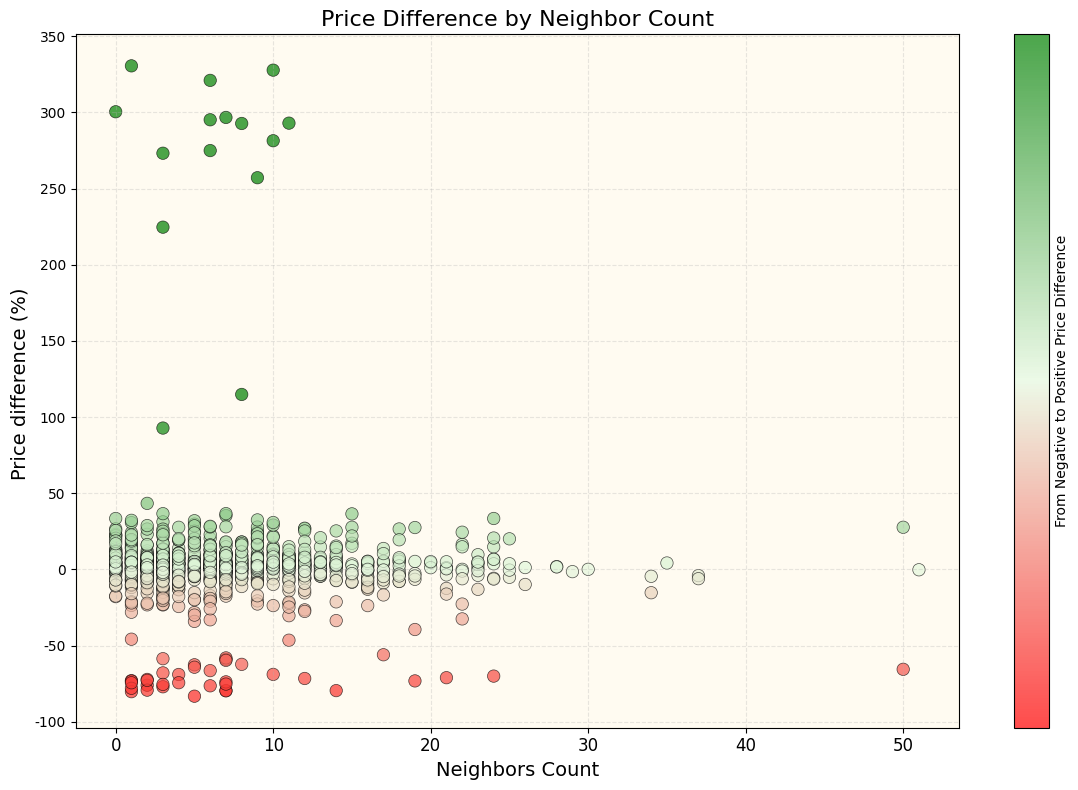

In [398]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

neighbor_count = data_diff['Neighbors_count']
price_difference = data_diff['Difference']

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#fffbf1')

norm = Normalize(vmin=-100, vmax=100)
cmap_seismic_r = mcolors.LinearSegmentedColormap.from_list(
    'seismic_r', [(0, 'red'), (0.5, '#e5f8de'), (1, 'green')])

plt.scatter(
    neighbor_count,
    price_difference,
    c=price_difference,
    cmap=cmap_seismic_r,
    alpha=0.7,
    edgecolors='k',
    linewidths=0.5,
    s=80,
    label='Data Points',
    norm=norm
)

plt.xlabel('Neighbors Count', fontsize=14)
plt.ylabel(f'Price difference (%) ', fontsize=14)
plt.title('Price Difference by Neighbor Count', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)
ytick_step = 50  # Specify the step between ticks

ytick_min = np.floor(price_difference.min() / 50) * 50  # Round down to the nearest 50
ytick_max = np.ceil(price_difference.max() / 50) * 50    # Maximum y-value for ticks

# Calculate the tick positions and labels
ytick_positions = np.arange(ytick_min, ytick_max + ytick_step, ytick_step)
ytick_labels = [str(int(tick)) for tick in ytick_positions]

plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.yticks(ytick_positions, ytick_labels)

cbar = plt.colorbar(label='From Negative to Positive Price Difference', orientation='vertical' )
cbar.set_ticks([])


plt.tight_layout()
plt.show()


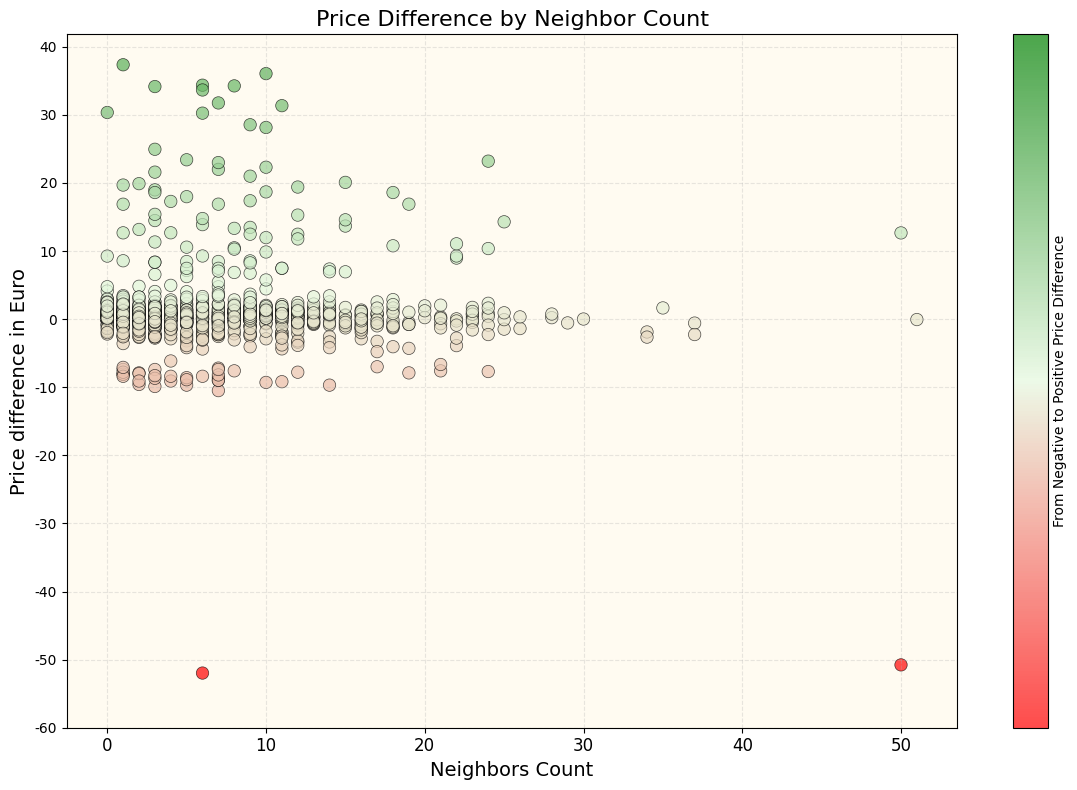

In [399]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

neighbor_count = data_diff['Neighbors_count']
price_difference = data_diff.Optimal_preis-data_diff.Preis

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#fffbf1')

norm = Normalize(vmin=-52, vmax=60)
cmap_seismic_r = mcolors.LinearSegmentedColormap.from_list(
    'seismic_r', [(0, 'red'), (0.5, '#e5f8de'), (1, 'green')])

plt.scatter(
    neighbor_count,
    price_difference,
    c=price_difference,
    cmap=cmap_seismic_r,
    alpha=0.7,
    edgecolors='k',
    linewidths=0.5,
    s=80,
    label='Data Points',
    norm=norm
)

plt.xlabel('Neighbors Count', fontsize=14)
plt.ylabel(f'Price difference in Euro', fontsize=14)
plt.title('Price Difference by Neighbor Count', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)
ytick_step = 10   # Specify the step between ticks

ytick_min = -60 # Round down to the nearest 50
ytick_max = 40  # Maximum y-value for ticks

# Calculate the tick positions and labels
ytick_positions = np.arange(ytick_min, ytick_max + ytick_step, ytick_step)
ytick_labels = [str(int(tick)) for tick in ytick_positions]

plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.yticks(ytick_positions, ytick_labels)

cbar = plt.colorbar(label='From Negative to Positive Price Difference', orientation='vertical' )
cbar.set_ticks([])


plt.tight_layout()
plt.show()


In [400]:
data_diff.Neighbors_count=data_diff.Neighbors_count.replace(0,1)
data_diff['Division']=(data_diff.Optimal_preis-data_diff.Preis)/data_diff.Neighbors_count

In [401]:
data_diff

,Qid,Preis,Optimal_preis,Min_optimal_preis_5%_margin,Max_optimal_preis_5%_margin,Neighbors_count,Difference,Division
0,12680,38.6,39.339339,37.372372,41.306306,8,1.915387,0.092417
1,13672,12.0,9.209209,8.748749,9.669670,3,-23.256590,-0.930264
2,13732,16.4,14.114114,13.408408,14.819820,11,-13.938329,-0.207808
3,13753,22.1,23.123123,21.966967,24.279279,1,4.629516,1.023123
4,13813,10.9,6.606607,6.276276,6.936937,19,-39.388930,-0.225968
...,...,...,...,...,...,...,...,...
995,417399,15.2,15.315315,14.549550,16.081081,7,0.758653,0.016474
996,417667,56.0,68.668669,65.235235,72.102102,1,22.622623,12.668669
997,418527,18.8,19.019019,18.068068,19.969970,2,1.164995,0.109510
998,420114,59.6,68.868869,65.425425,72.312312,6,15.551793,1.544811


In [431]:
min_ = data_diff.Division.min()
max_ = data_diff.Division.max()
N = 10

category = pd.cut(data_diff.Division,
       bins=np.linspace(min_, max_, N), 
       labels=np.arange(N-1), 
       precision=24, 
       include_lowest=True)

In [432]:
labels, counts = np.unique(category.values.to_numpy(), return_counts=True)

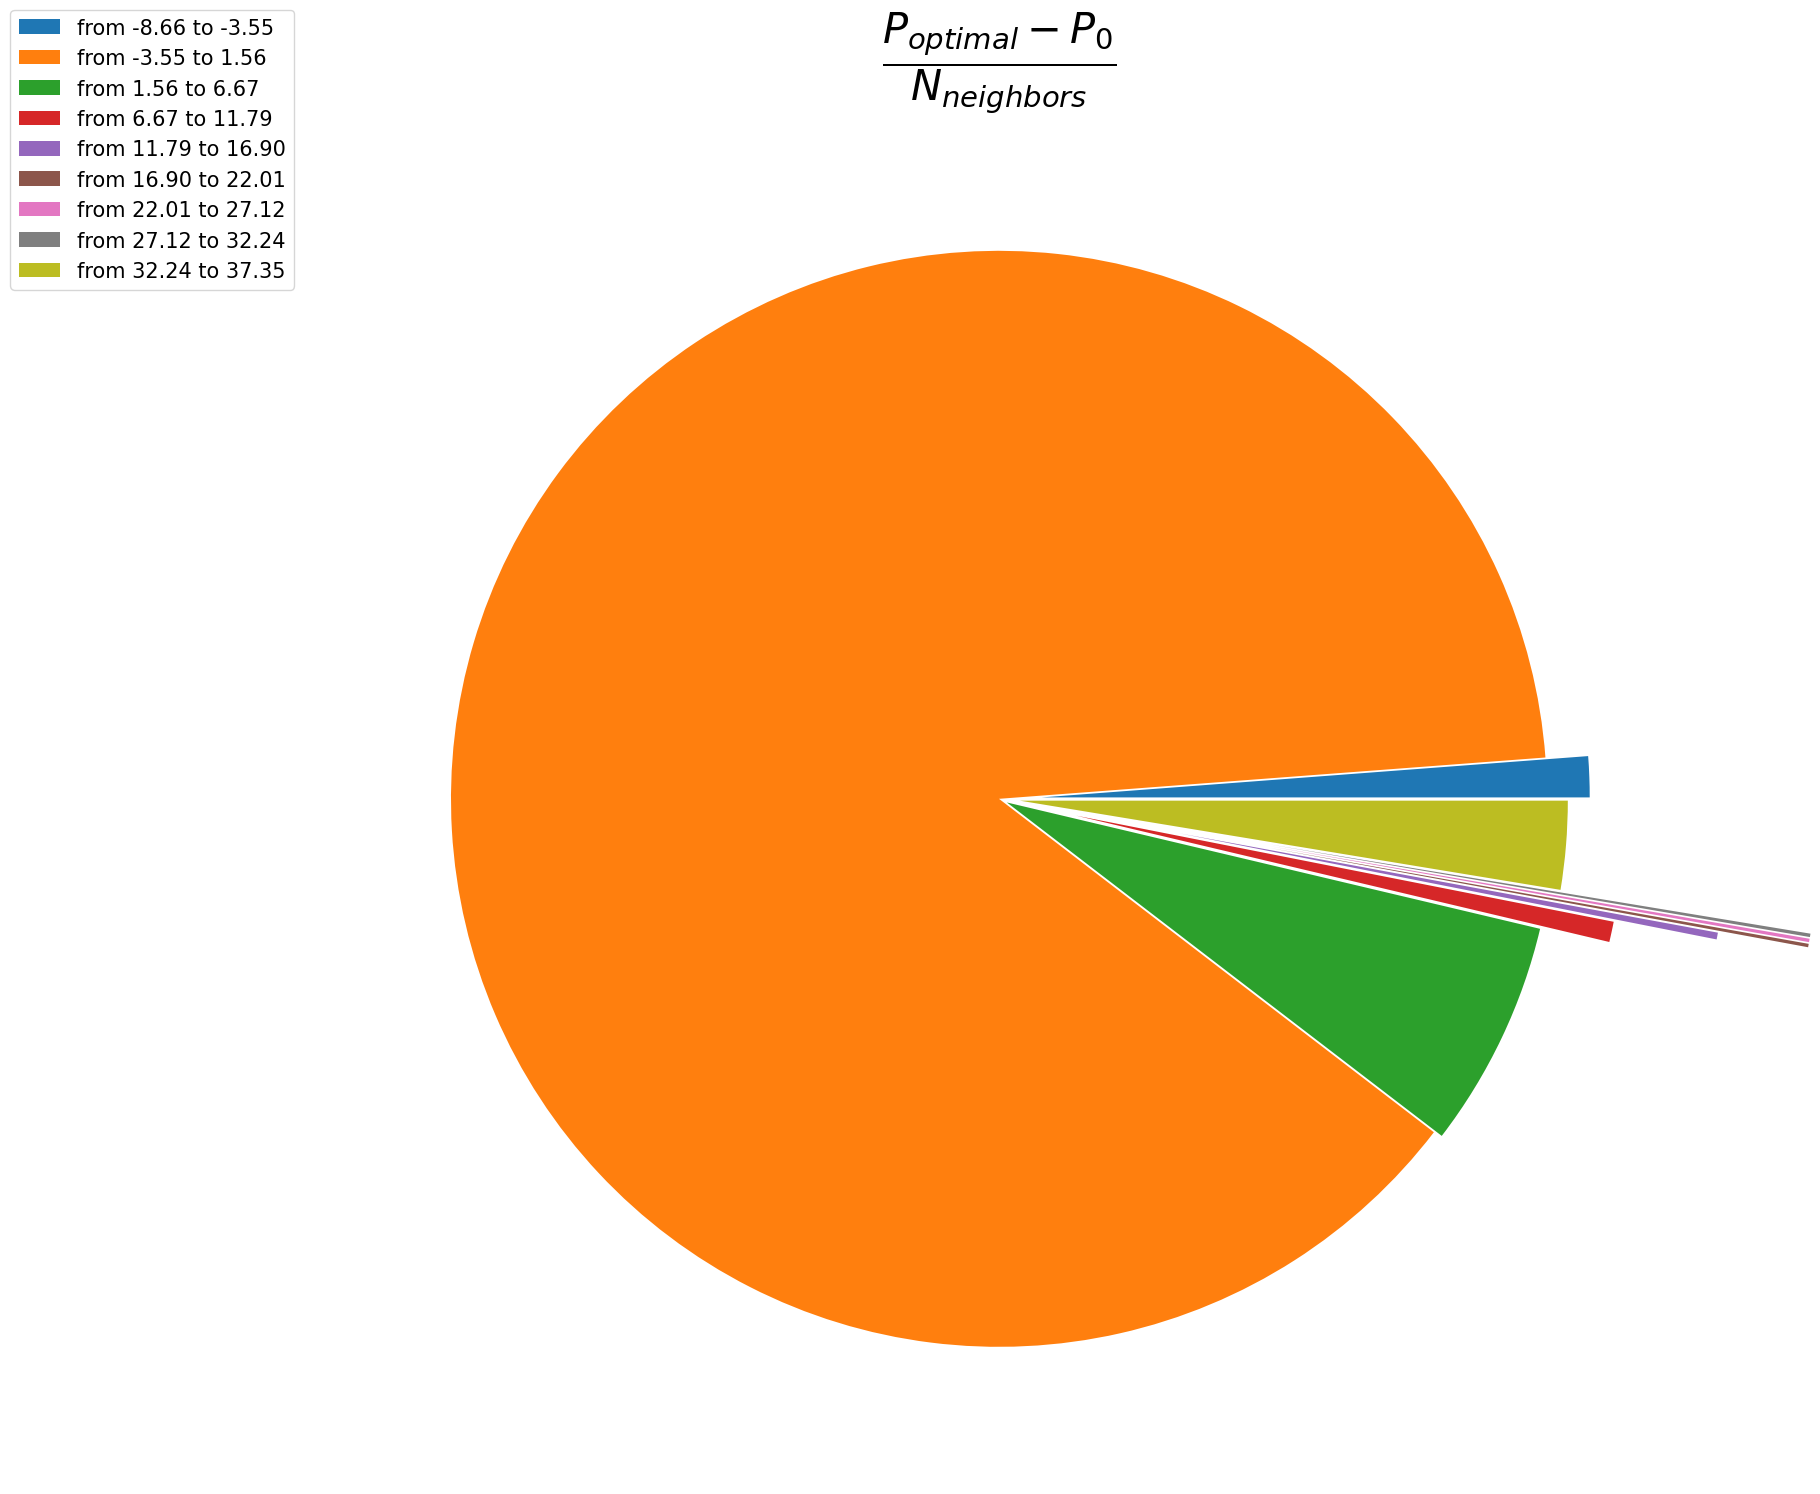

In [433]:
fig = plt.figure(figsize=(20, 14))
plt.pie(counts, explode=1/(counts + 1))

labels = []
tmp = np.linspace(min_, max_, N)

for j,_ in enumerate(tmp[:-1]):
    labels.append(f"from {tmp[j]:.2f} to {tmp[j+1]:.2f}")

fig.legend(labels, fontsize="15", loc="upper left")
fig.tight_layout()
plt.title("$\dfrac{P_{optimal} - P_{0}}{N_{neighbors}}$", fontsize=30)
plt.show()